In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
PERIODS = ['3min', '5min', '15min', '30min', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '7d', '30d']
START_DATE = '2022-01-01'
INITIAL_DATE = '2022-01-31'
FINISH_DATE = '2022-03-01'

In [3]:
df = pd.read_parquet('data/BTC-USDT.parquet')

Text(0, 0.5, 'Price')

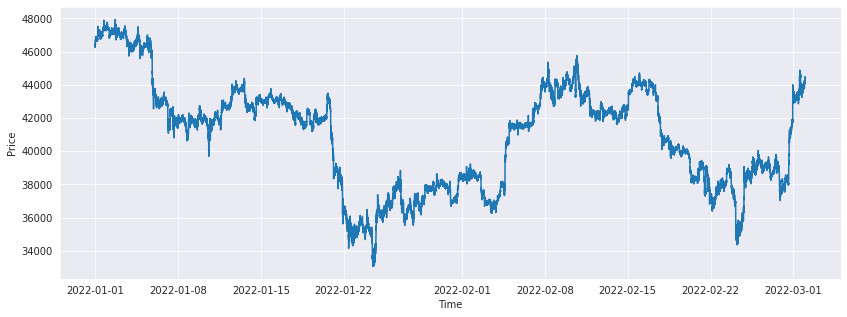

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(df[START_DATE:FINISH_DATE].index, df[START_DATE:FINISH_DATE]['close'])
ax.set_xlabel("Time")
ax.set_ylabel("Price")

In [5]:
df_train = df[START_DATE:FINISH_DATE][['open', 'high', 'low', 'close']].copy()
df_train[['open', 'high', 'low', 'close']] = df_train[['open', 'high', 'low', 'close']] - df_train[['open', 'high', 'low', 'close']].mean().mean()
df_train[['open', 'high', 'low', 'close']] = df_train[['open', 'high', 'low', 'close']] / df_train[['open', 'high', 'low', 'close']].std().mean()
df_train['price'] = df[START_DATE:FINISH_DATE]['close']

for period in PERIODS:
    df_train['open' + period] = df_train['open'].rolling(period).agg(lambda rows: rows[0])
    df_train['high' + period] = df_train['high'].rolling(period).max()
    df_train['low' + period] = df_train['low'].rolling(period).min()

In [6]:
df_train[INITIAL_DATE:].to_parquet('data/df_train.parquet')